In [1]:
import os
import glob

import DESutils
import GPRutils
import vK2KGPR
import plotGPR
import vK2KGPR
import vonkarmanFT as vk

import numpy as np
import astropy.units as u
import astropy.table as tb
from astropy.time import Time
import matplotlib.pyplot as plt
plt.style.use('~/GitHub/custom-matplotlib/custom.mplstyle')

from IPython import embed
from importlib import reload
import warnings
warnings.filterwarnings("ignore")

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
def xiBA(
    exps,
    rMax,
    plotPercs=False,
    save=None
        ):

    plt.figure(figsize=(20, 10))

    reduction = []
    for exp in exps:
        dC = GPRutils.loadFITS(exp)
        
        xi1, xi2 = dC.JackKnifeXi(rMax=rMax)
        
        xi0 = np.abs(xi1[0].value)
        Xerr = xi1[1].value
        Yerr = xi1[2].value
        xi0err = np.sqrt(Xerr**2 + Yerr**2)

        xif = np.abs(xi2[0].value)
        Xerr = xi2[1].value
        Yerr = xi2[2].value
        xiferr = np.sqrt(Xerr**2 + Yerr**2)

        red = xi0/xif
        rederr = np.sqrt(((xi0err/xi0)**2 + (xiferr/xif)**2) * red**2)

        reduction.append(red)

        if dC.band == "g": c = "deepskyblue"
        if dC.band == "r": c = "red"
        if dC.band == "i": c = "darkred"
        if dC.band == "z": c = "black"

        plt.errorbar(
            xi0, xif,
            xerr=Xerr, yerr=Yerr,
            color=c, marker=".",
            linewidth=0.5, capsize=1)
        # plt.annotate(f"{dC.expNum} {dC.band}", (xi0, xif), fontsize=10)
        
    plt.ylim((0, None))
    plt.xlim((0, None))

    x = np.linspace(0, 1000, 2)
    if plotPercs:
        percs = np.percentile(reduction, (25, 50, 75))
        perc25 = plt.plot(x, x/percs[0], c="black", linewidth=1, ls=":", label=f"{np.round(percs[0], 2)}x Reduction \n(25th Percentile)")[0]
        perc50 = plt.plot(x, x/percs[1], c="black", linewidth=1, ls="--", label=f"{np.round(percs[1], 2)}x Reduction \n(50th Percentile)")[0]
        perc75 = plt.plot(x, x/percs[2], c="black", linewidth=1, ls=":", label=f"{np.round(percs[2], 2)}x Reduction \n(75th Percentile)")[0]
        legend2 = plt.legend(handles=[perc25, perc50, perc75], loc="lower right", framealpha=0.25)
        plt.gca().add_artist(legend2)

    # Central wavelength of DES passband filters:
    # g: 473 nm
    # r: 642 nm
    # i: 784 nm
    # z: 926 nm
    # From Flaugher et al. (2015) "The Dark Energy Camera" arxiv:1504.02900
    gband = plt.scatter(-1, 0, alpha=1, color="deepskyblue", label="g band")
    rband = plt.scatter(-1, 0, alpha=1, color="red", label="r band")
    iband = plt.scatter(-1, 0, alpha=1, color="darkred", label="i band")
    zband = plt.scatter(-1, 0, alpha=1, color="black", label="z band")
    legend1 = plt.legend(handles=[gband, rband, iband, zband], loc="upper right", framealpha=0.25)
    plt.gca().add_artist(legend1)
    
    noChange = plt.plot(x, x, "k:", label="No Change")[0]
    red5 = plt.plot(x, x/5, c="tab:blue", ls=":", label="5x Reduction")[0]
    red10 = plt.plot(x, x/10, c="tab:orange", ls=":", label="10x Reduction")[0]
    red20 = plt.plot(x, x/20, c="tab:green", ls=":", label="20x Reduction")[0]
    legend3 = plt.legend(handles=[noChange, red5, red10, red20], loc="upper left", framealpha=0.25)
    plt.gca().add_artist(legend3)

    plt.xlabel(r"$\xi_{0}$ Raw [mas$^2$]")
    plt.ylabel(r"$\xi_{0}$ GPR Model Subtracted [mas$^2$]")
    
    if save is not None:
        plt.savefig(save)
    plt.show()

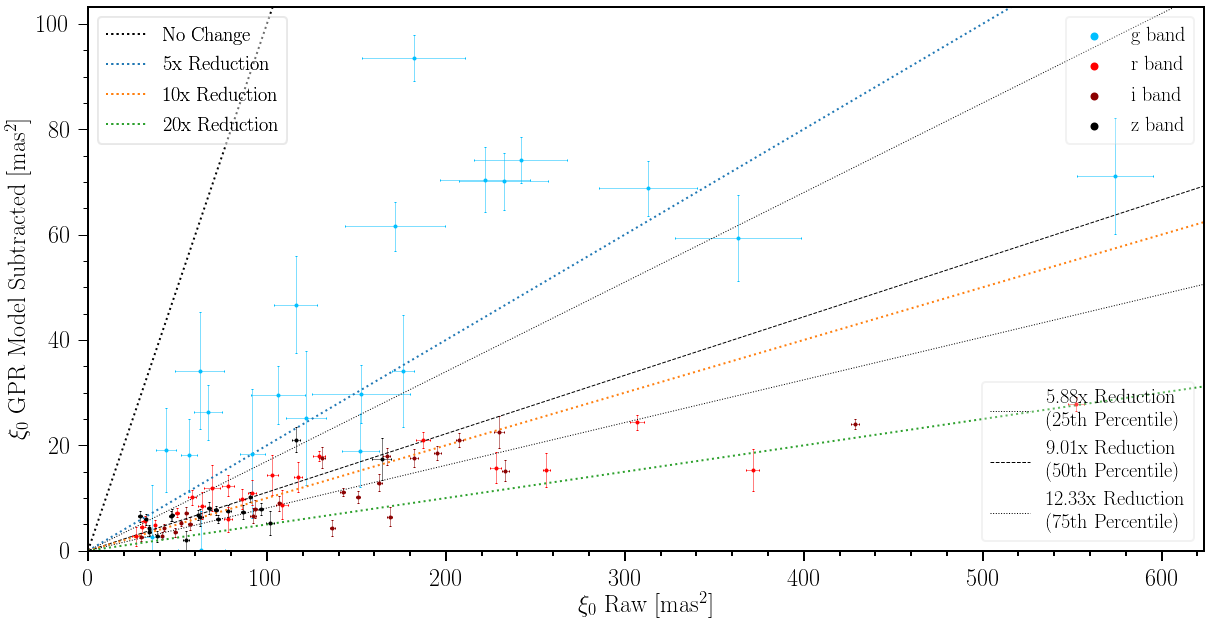

In [6]:
exps = sorted(glob.glob(f"/home/fortino/GPRSolutions/dualOpt_NMmax/GPR.??????.[g,r,i,z]RC.fits"))
rMax = 0.5*u.arcmin

xiBA(
    exps,
    rMax,
    plotPercs=True,
    save="/home/fortino/xiBA.png")

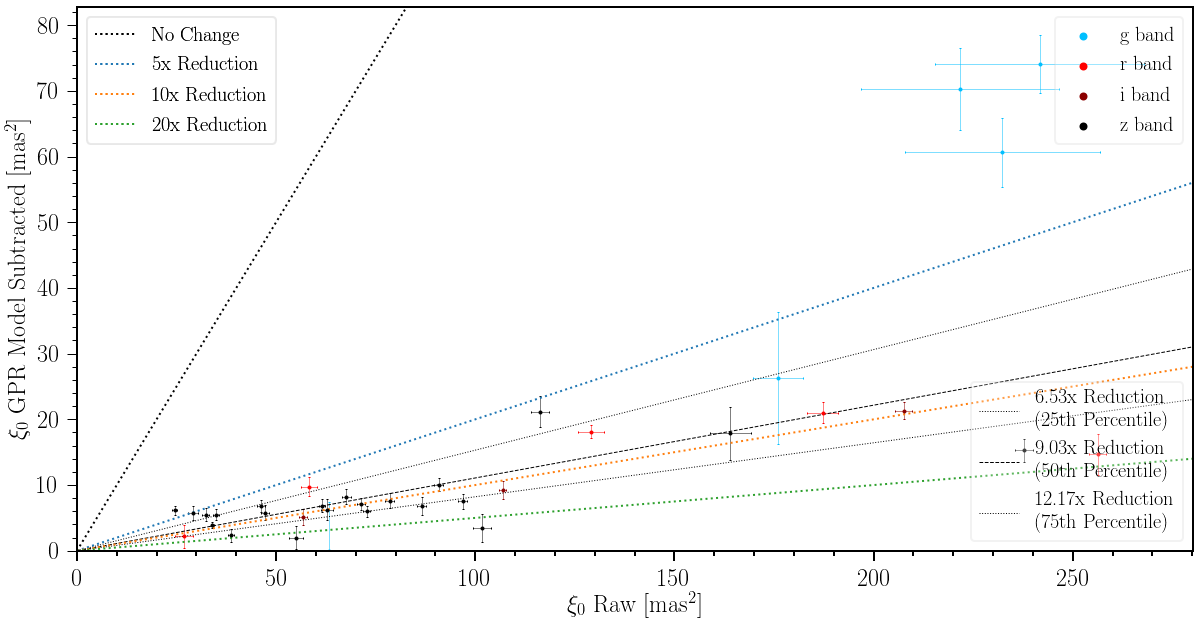

In [5]:
exps = sorted(glob.glob(f"/home/fortino/GPRSolutions/L_BFGS_B_max/GPR.??????.[g,r,i,z]RC.fits"))
rMax = 0.5*u.arcmin

xiBA(
    exps,
    rMax,
    plotPercs=True,
    save="/home/fortino/xiBA.png")